In [7]:
from vnpy.app.spread_trading.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.spread_trading.strategies.statistical_arbitrage_strategy import (
    StatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.strategies.bm_arbitrage_strategy import (
    BmArbitrageStrategy
)

from vnpy.app.spread_trading.strategies.basic_spread_strategy import (
    BasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_basic_spread_strategy import (
    BmBasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.spread_statistical_arbitrage_strategy import (
    SpreadStatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.strategies.bm_multi_basic_spread_strategy import (
    BmMultiBasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_basic_date_spread_strategy import (
    BmBasicDateSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_q_date_spread_strategy import (
    BmQDateSpreadStrategy
)
from vnpy.app.spread_trading.strategies.spread_rate_strategy import (
    SpreadRateStrategy
)
from vnpy.app.spread_trading.base import LegData, SpreadData
from datetime import datetime


In [8]:
 spread = SpreadData(
     name="BM",
     legs=[LegData("BTC-USD.COINBASE"), LegData("XBTH19.BITMEX")],
     price_multipliers={"XBTH19.BITMEX": -1, "BTC-USD.COINBASE": 1},
     trading_multipliers={"XBTH19.BITMEX": -1, "BTC-USD.COINBASE": 1},
     active_symbol="BTC-USD.COINBASE",
     inverse_contracts={"XBTH19.BITMEX": False, "BTC-USD.COINBASE": False}, # 正向
     min_volume=1
 )

In [9]:
engine = BacktestingEngine()
engine.set_parameters(
 spread=spread,
 interval="1m",
 start=datetime(2018, 12, 17),
 end=datetime(2019, 3, 29),
 rate=0.00075,
 slippage=0.5,
 size=1,
 pricetick=0.2,
 capital=1_000_000,
)

# engine.add_strategy(StatisticalArbitrageStrategy, {})
# engine.add_strategy(SpreadStatisticalArbitrageStrategy, {}) #添加boll 差价 判读开仓

# engine.add_strategy(BmArbitrageStrategy, {})
# engine.add_strategy(BasicSpreadStrategy , {})
# engine.add_strategy(BmBasicSpreadStrategy, {"short_price": 150, "cover_price" : 50}) # 只远期开空，近期开多 符合平仓条件后，平空 平多
# 只远期开空，近期开多 添添加最终平仓日期 符合平仓条件后，平空 平多
# engine.add_strategy(BmQDateSpreadStrategy, {"short_rate": 1.3, "cover_rate" : 0.3, "end_date": "2019-3-29", "end_days": 1}) 
engine.add_strategy(SpreadRateStrategy, {"short_rate":1.9, "cover_rate" :-0.2, "end_date": "2019-03-29", "end_days": 1}) 

# engine.add_strategy(BmMultiBasicSpreadStrategy, {}) # 主动腿多空循环开仓
# engine.add_strategy(BmBasicDateSpreadStrategy, {"short_price": 100, "cover_price" : 50, "start_days" : 3, "end_days": 5, "max_pos" : 50})


2020-02-23 23:51:46.188733	开始加载历史数据
2020-02-23 23:52:18.015553	历史数据加载完成，数据量：146708
2020-02-23 23:52:18.313929	策略初始化完成
2020-02-23 23:52:18.314031	开始回放历史数据
2020-02-23 23:52:22.429271	历史数据回放结束
2020-02-23 23:52:22.429481	开始计算逐日盯市盈亏
2020-02-23 23:52:22.432068	逐日盯市盈亏计算完成
2020-02-23 23:52:22.432402	开始计算策略统计指标
2020-02-23 23:52:22.439333	------------------------------
2020-02-23 23:52:22.439365	首个交易日：	2018-12-27
2020-02-23 23:52:22.439380	最后交易日：	2019-03-29
2020-02-23 23:52:22.439393	总交易日：	93
2020-02-23 23:52:22.439407	盈利交易日：	52
2020-02-23 23:52:22.439420	亏损交易日：	40
2020-02-23 23:52:22.439436	起始资金：	1,000,000.00
2020-02-23 23:52:22.439452	结束资金：	1,008,238.37
2020-02-23 23:52:22.439466	总收益率：	0.82%
2020-02-23 23:52:22.439577	年化收益：	2.13%
2020-02-23 23:52:22.439593	最大回撤: 	-4,720.00
2020-02-23 23:52:22.439607	百分比最大回撤: -0.47%
2020-02-23 23:52:22.439620	最长回撤天数: 	3
2020-02-23 23:52:22.439634	总盈亏：	8,238.37
2020-02-23 23:52:22.439648	总手续费：	551.63
2020-02-23 23:52:22.439661	总滑点：	50.00
2020-02-23 23:52:22.4396

/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:385: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


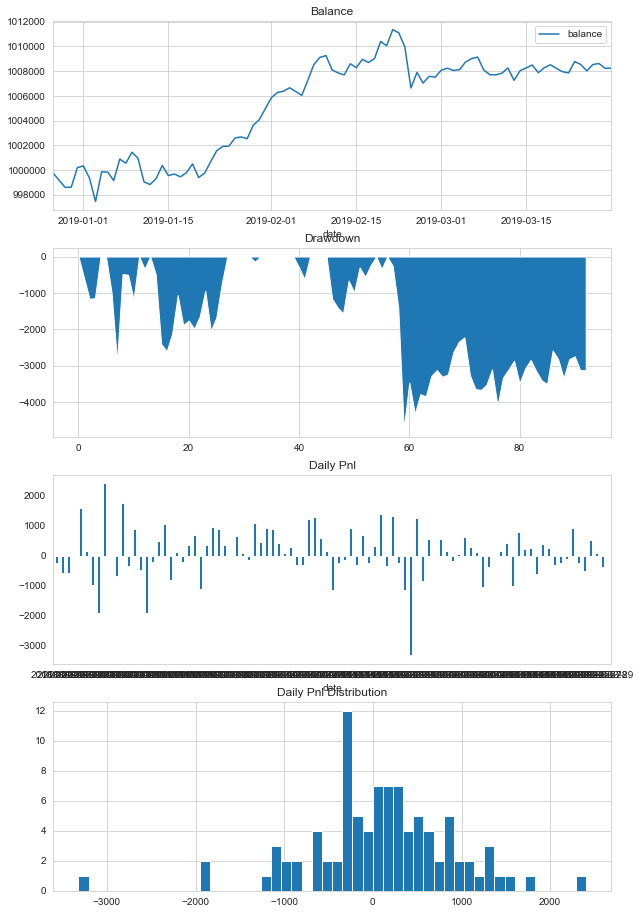

0:00:39.788529


In [10]:
start = datetime.now()
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()
end = datetime.now()
print(end-start)

In [11]:
for trade in engine.trades.values():
    print(trade.orderid, trade.tradeid, trade.direction, trade.price, trade.spread_rate, trade.volume, trade.time)
for trade in engine.trades.values():
    print(trade)

1 1 Direction.SHORT 98.0 2.70221854760921 100.0 2018-12-27 00:01:00
TradeData(gateway_name='BACKTESTING', symbol='BM', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='1', tradeid='1', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=98.0, volume=100.0, time='2018-12-27 00:01:00', spread_rate=2.70221854760921)


In [12]:
setting = OptimizationSetting()


setting.set_target("total_return")
# setting.set_target("sharpe_ratio")
# setting.set_target("return_drawdown_ratio")
# setting.set_target("daily_net_pnl")



setting.add_parameter("cover_rate", -1, 0.1, 0.2)
setting.add_parameter("short_rate",1, 3, 0.2)
setting.add_parameter("end_date", "2019-03-29")
print(setting.__dict__)
# setting.add_parameter("start_days", 0, 5, 1)
# setting.add_parameter("short_price", 0, 5, 1)


# setting.add_parameter("atr_ma_length", 10, 30, 1)

# engine.run_ga_optimization(setting)

# engine.run_optimization(setting)

{'params': {'cover_rate': [-1, -0.8, -0.6000000000000001, -0.4000000000000001, -0.20000000000000007, -5.551115123125783e-17], 'short_rate': [1, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998, 2.1999999999999997, 2.4, 2.6, 2.8000000000000003], 'end_date': ['2019-03-29']}, 'target_name': 'total_return'}
